In [1]:
!pip freeze > ../requirements.txt

In [2]:
import os
import sys
sys.path.append(r'..')
from collections import Counter

from utils.data_loaders import *
from scripts.data_transformation import *
from scripts.sentiment_analysis import *
from scripts.visualization import *
from scripts.text_analysis import *

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-1\env\Lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Load the data
dataset_path = os.path.join(r"../datasets/cleaned", "analyst_ratings_cleaned.csv")
df = load_analyst_ratings(dataset_path)
# analyst_ratings_df = load_data(dataset_path)

2024-12-18 10:30:33,830 - INFO - Loading analyst ratings from ../datasets/cleaned\analyst_ratings_cleaned.csv
2024-12-18 10:30:43,605 - INFO - Analyst ratings loaded successfully.


In [4]:
# Clean and preprocess the data
df, _ = clean_and_preprocess_data(df, text_columns=["headline"], date_column="date")

[INFO] Cleaning data...
[INFO] Data cleaning completed.
[INFO] Transforming data...
[INFO] Data transformation completed.


In [5]:
# Headline Length Statistics
df['headline_length'] = df['headline'].apply(len)
df[['headline_length']].describe(), df['headline_length'].median()

(       headline_length
 count     1.407297e+06
 mean      5.498508e+01
 std       3.069290e+01
 min       1.000000e+00
 25%       3.500000e+01
 50%       4.800000e+01
 75%       6.600000e+01
 max       3.990000e+02,
 48.0)

In [6]:
# Top Keywords
keywords, top_keywords = extract_keywords_tfidf(df['headline'])

for keyword, score in top_keywords:
    print(f"{keyword}: {score}")

stock: 169959.4403521955
report: 81049.55779427158
share: 77675.09289801762
market: 77116.2771635511
earnings: 76409.04237775877
eps: 69913.30774141292
update: 63479.3671759199
est: 61066.10574957228
top: 57075.254729552704
sale: 55332.650475541384
announces: 54378.07642119027
benzinga: 54140.70261717699
price: 51180.59450338002
buy: 49170.446076406646
pt: 46905.54439746845
downgrade: 46871.56175670937
raise: 41281.99153360333
lower: 40377.672058823344
company: 39770.49197178736
trading: 37148.06728862398


In [7]:
# Extracts the most common n-grams
N = 10 # Top N Phrases
ngrams_list = extract_phrases_ngrams(df['headline'], n=2)
for phrase, freq in Counter(ngrams_list).most_common(N):
    print(f"{' '.join(phrase)}: {freq}")

v est: 93837
eps v: 58428
price target: 47708
benzinga top: 44259
stock moving: 40098
market update: 33233
earnings scheduled: 32054
initiate coverage: 29041
raise pt: 27284
share several: 24081


In [8]:
# Identify keywords or phrases
all_keywords = get_all_keywords(df["headline"])

# Common Keywords or Phrases
common_keywords = Counter(all_keywords).most_common(20)
for keyword, count in common_keywords:
    print(f"{keyword}: {count}")

stock: 201036
v: 139366
eps: 128801
share: 126637
report: 124456
est: 122340
market: 120863
update: 93295
earnings: 87183
sale: 85314
top: 81094
benzinga: 74466
price: 74194
pt: 73132
buy: 68510
lower: 68039
announces: 66531
company: 65404
downgrade: 63809
trading: 61146


c:\Users\Darkles\10academy\10Academy-Kifiya-Week-1\notebooks\..\scripts\visualization.py:154: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Legend")


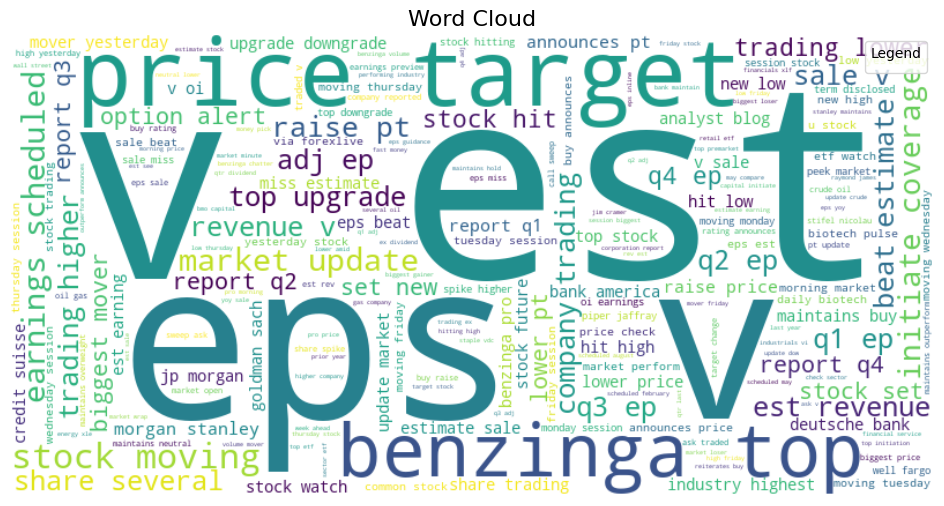

In [9]:
# Generate a word cloud from the headlines
generate_wordcloud(all_keywords)

In [10]:
# Perform sentiment analysis on headlines for Sentiment Distribution
sentiment_summary = analyze_sentiment(df['headline'])
df['sentiment'] = sentiment_summary['sentiment']
df['sentiment_category'] = sentiment_summary['sentiment_category']


In [11]:
sentiment_summary

,sentiment,sentiment_category
0,0.16,positive
1,0.16,positive
2,0.00,neutral
3,0.00,neutral
4,0.00,neutral
...,...,...
1407322,0.15,positive
1407323,0.50,positive
1407324,0.00,neutral
1407325,0.00,neutral


In [12]:
# Specialized Plotting Functions
def plot_sentiment_distribution(column, title):
    """Plots the sentiment distribution."""
    
    plt.figure(figsize=(8, 5))
    # plt.hist(column, bins=15, color='blue', alpha=0.7)
    counts = column.value_counts()
    counts.plot(kind='bar', color=['Yellow', 'green', 'red'])
    plt.title(title)
    plt.xlabel("Sentiment")
    plt.ylabel(f"Frequency of {title}")
    plt.xticks(rotation=45)
    plt.legend(title="Legend")
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show() 

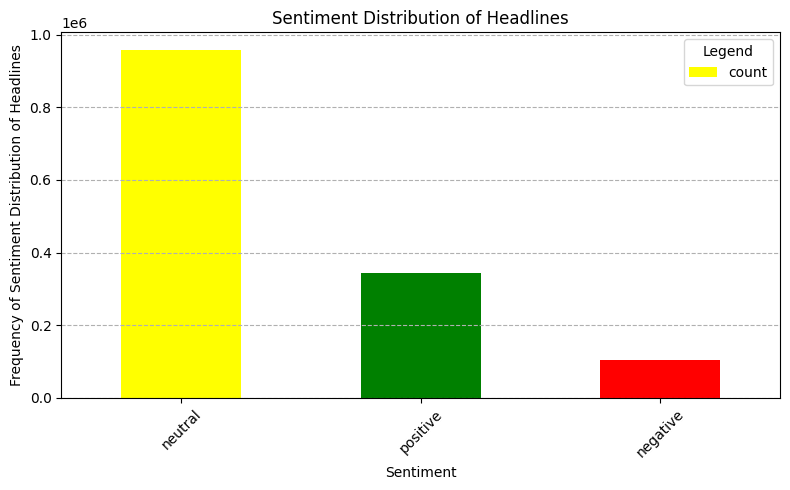

In [13]:
df['sentiment_category'] = sentiment_summary['sentiment_category']
plot_sentiment_distribution(df['sentiment_category'], "Sentiment Distribution of Headlines")
# plot_bar(df, 'sentiment_category', "Headlines Sentiment Over Time", xlabel="Date", ylabel="Average Sentiment")

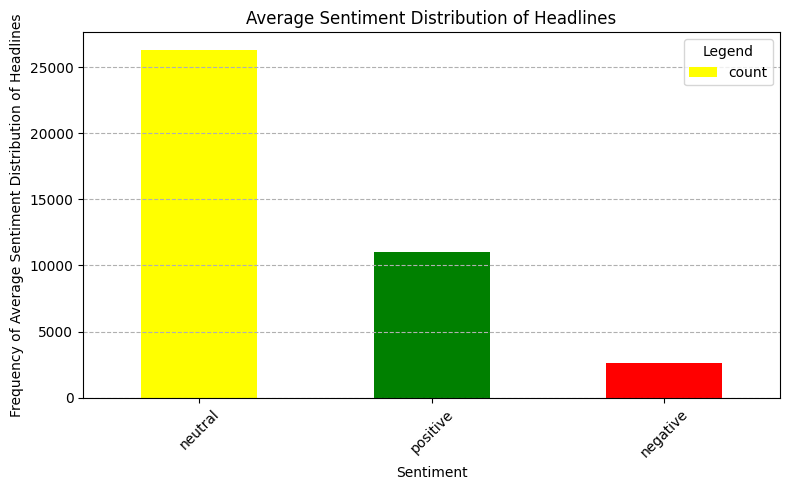

In [14]:
aggregate_summary = aggregate_sentiment(df, "sentiment", "date")
plot_sentiment_distribution(aggregate_summary['average_sentiment_category'], "Average Sentiment Distribution of Headlines")

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-1\notebooks\..\scripts\visualization.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Legend")
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-1\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


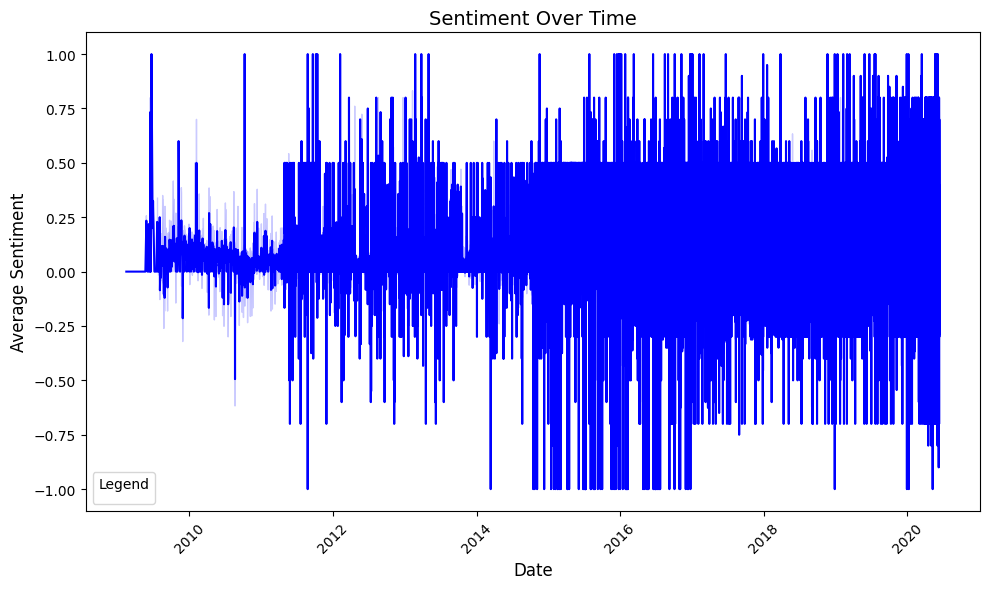

In [15]:
plot_sentiment_over_time(df, 'date', 'sentiment', "Sentiment Over Time", xlabel="Date", ylabel="Average Sentiment", grid=False)

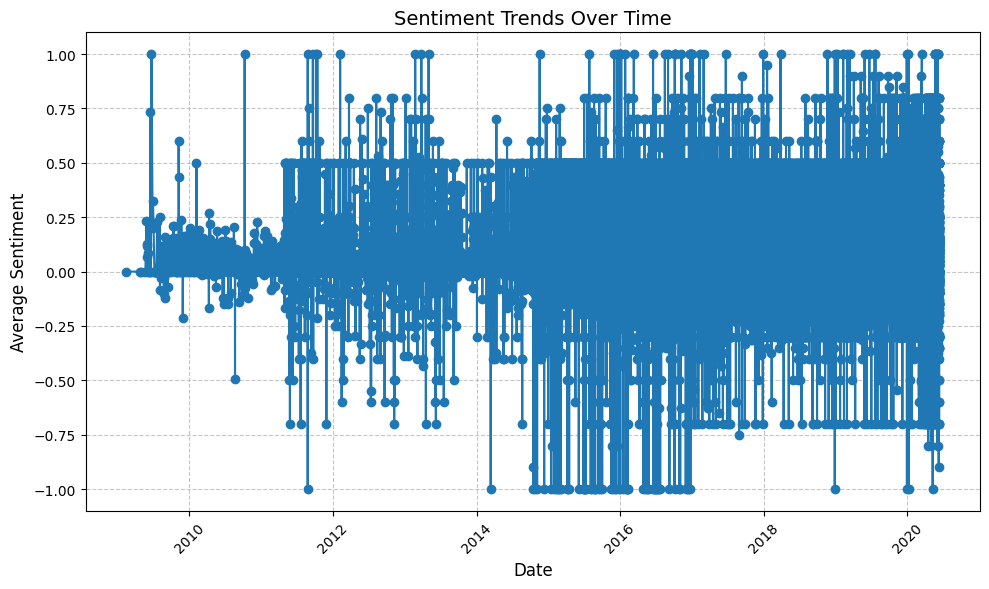

In [16]:
plot_sentiment_trends(aggregate_summary, date_column='date', sentiment_column='average_sentiment')

In [17]:

# Sentiment vs. Events Overlay
def plot_sentiment_with_events(sentiment_summary, events, date_column='date', sentiment_column='average_sentiment'):
    plt.figure(figsize=(10, 6))
    plt.plot(sentiment_summary[date_column], sentiment_summary[sentiment_column], marker='o', linestyle='-', label='Sentiment')
    
    for event_date, event_desc in events.items():
        plt.axvline(x=pd.to_datetime(event_date), color='red', linestyle='--', alpha=0.7)
        plt.text(pd.to_datetime(event_date), 0.1, event_desc, rotation=45, fontsize=10, color='red')
    
    plt.title('Sentiment Trends with Events', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Average Sentiment', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

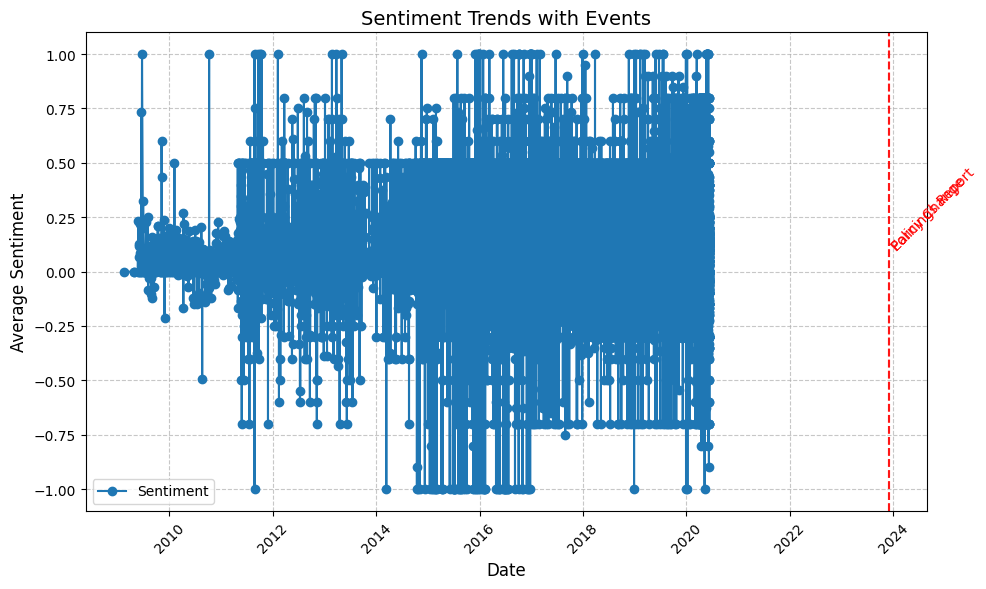

In [18]:
events = {"2023-12-01": "Earnings Report", "2023-12-02": "Policy Change"}
plot_sentiment_with_events(aggregate_summary, events)

In [19]:
# Analyze aspect-based sentiment 
aspects = [
    "revenue", "growth", "profit", "high", "low", "medium", "strong", "weak", "positive", "negative", 
    "neutral", "risk", "return", "market", "economy", "interest", "inflation", "recession"
]
for i in range(100):
    print(df["headline"].iloc[i])
    print(analyze_aspect_sentiment(df["headline"].iloc[i], aspects))

stock hit high friday
{'high': 0.16}
stock hit high wednesday
{'high': 0.16}
71 biggest mover friday
{}
46 stock moving friday session
{}
b security maintains neutral agilent technology raise price target 88
{'neutral': 0.0}
cfra maintains hold agilent technology lower price target 85
{'low': 0.0}
ubs maintains neutral agilent technology raise price target 87
{'neutral': 0.0}
agilent technology share trading higher company reported q2 eps sale result
{'high': 0.25}
well fargo maintains overweight agilent technology raise price target 95
{}
10 biggest price target change friday
{}
30 stock moving friday session
{}
svb leerink maintains outperform agilent technology raise price target 95
{}
8 stock moving thursday session
{}
agilent technology share trading higher company reported q2 eps sale result
{'high': 0.25}
agilent technology q2 adj eps beat estimate sale beat estimate
{}
earnings scheduled may 21 2020
{}
agilent technology receives fda approval companion diagnostic
{}
q1 13f roun